In [42]:
from IPython.display import display

In [28]:
import matplotlib.pyplot as plt
import csv

In [29]:
data_tasklet_scaling = """DPU instructions, 1, 1, 60000, 2173012288
DPU instructions, 1, 2, 60000, 1086506224
DPU instructions, 1, 3, 60000, 724337552
DPU instructions, 1, 4, 60000, 543253244
DPU instructions, 1, 5, 60000, 434602646
DPU instructions, 1, 6, 60000, 362168941
DPU instructions, 1, 9, 60000, 241446124
DPU instructions, 1, 12, 60000, 181084749
DPU instructions, 1, 16, 60000, 135813770
DPU instructions, 1, 20, 60000, 108651184
DPU instructions, 1, 24, 60000, 90542833"""

data_sample_scaling = """DPU instructions, 1, 16, 500, 1132272
DPU instructions, 1, 16, 1000, 2264052
DPU instructions, 1, 16, 5000, 11318098
DPU instructions, 1, 16, 10000, 22635956
DPU instructions, 1, 16, 15000, 33953520
DPU instructions, 1, 16, 30000, 67907068
DPU instructions, 1, 16, 60000, 135813766"""

data_dpu_strong_scaling = """DPU instructions, 1, 16, 60000, 135813770
DPU instructions, 2, 16, 60000, 67907175
DPU instructions, 4, 16, 60000, 33954021
DPU instructions, 8, 16, 60000, 16977333
DPU instructions, 16, 16, 60000, 8489111
DPU instructions, 32, 16, 60000, 4244834
DPU instructions, 64, 16, 60000, 2123892"""

data_dpu_weak_scaling = """DPU instructions, 1, 16, 937, 2121454
DPU instructions, 2, 16, 1874, 2121454
DPU instructions, 4, 16, 3748, 2121454
DPU instructions, 8, 16, 7496, 2121621
DPU instructions, 16, 16, 14992, 2121621
DPU instructions, 32, 16, 29984, 2121624
DPU instructions, 64, 16, 59968, 2121624"""

In [30]:
def parse_csv(csv_string, col_choices):
    result = []
    replaced_csv_str = csv_string.replace(', ', ',').replace(' ', '').split('\n')
    # print(replaced_csv_str)
    csv_parsed = csv.reader(replaced_csv_str, delimiter=',', lineterminator='\n')
    for row in csv_parsed:
        # print(row)
        selected_values = [row[col] for col in col_choices]
        result.append(selected_values)

    return result

In [31]:
tasklet_scaling_xy = parse_csv(data_tasklet_scaling, [2, 4])
sample_scaling_xy = parse_csv(data_sample_scaling, [3, 4])
dpu_strong_scaling_xy = parse_csv(data_dpu_strong_scaling, [1, 4])
dpu_weak_scaling_xy = parse_csv(data_dpu_weak_scaling, [1, 4])

In [32]:
tasklet_scaling_x = [int(pair[0]) for pair in tasklet_scaling_xy]
tasklet_scaling_y = [int(pair[1]) for pair in tasklet_scaling_xy]

sample_scaling_x = [int(pair[0]) for pair in sample_scaling_xy]
sample_scaling_y = [int(pair[1]) for pair in sample_scaling_xy]

dpu_strong_scaling_x = [int(pair[0]) for pair in dpu_strong_scaling_xy]
dpu_strong_scaling_y = [int(pair[1]) for pair in dpu_strong_scaling_xy]

dpu_weak_scaling_x = [int(pair[0]) for pair in dpu_weak_scaling_xy]
dpu_weak_scaling_y = [int(pair[1]) for pair in dpu_weak_scaling_xy]

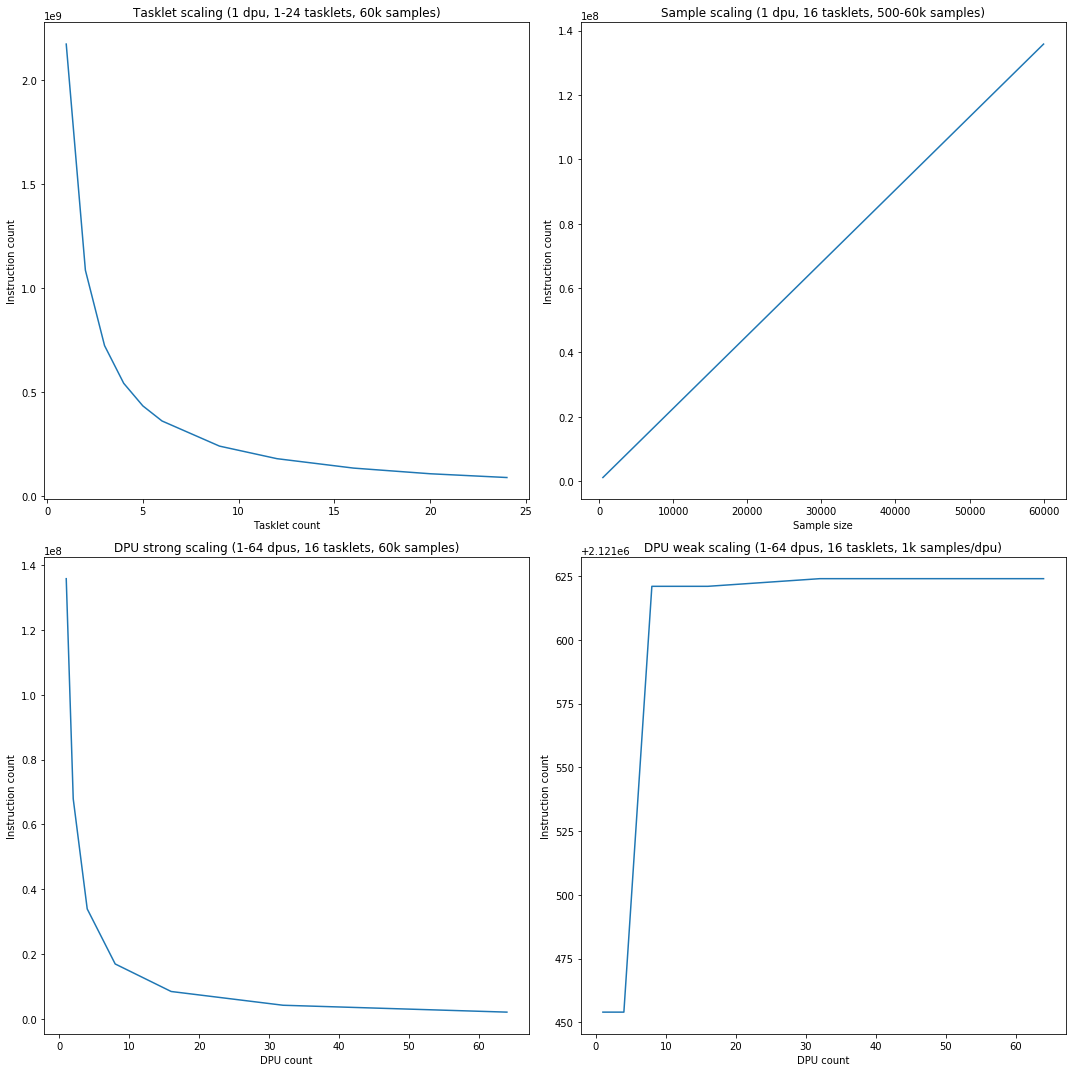

In [53]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 15))
ax1, ax2, ax3, ax4 = axes.flat

ax1.plot(tasklet_scaling_x, tasklet_scaling_y)

ax1.set_xlabel("Tasklet count")
ax1.set_ylabel("Instruction count")

ax1.set_title("Tasklet scaling (1 dpu, 1-24 tasklets, 60k samples)")

ax2.plot(sample_scaling_x, sample_scaling_y)

ax2.set_xlabel("Sample size")
ax2.set_ylabel("Instruction count")

ax2.set_title("Sample scaling (1 dpu, 16 tasklets, 500-60k samples)")

ax3.plot(dpu_strong_scaling_x, dpu_strong_scaling_y)

ax3.set_xlabel("DPU count")
ax3.set_ylabel("Instruction count")

ax3.set_title("DPU strong scaling (1-64 dpus, 16 tasklets, 60k samples)")

ax4.plot(dpu_weak_scaling_x, dpu_weak_scaling_y)

ax4.set_xlabel("DPU count")
ax4.set_ylabel("Instruction count")

ax4.set_title("DPU weak scaling (1-64 dpus, 16 tasklets, 1k samples/dpu)")

fig.tight_layout()

plt.show()